In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
###Maximum number of words 
num_words = 10000
###Maximum news length
max_news_len = 30
###Number of news classes
nb_classes = 4

In [4]:
train = pd.read_csv('news/train.csv', 
                    header=None, 
                    names=['class', 'title', 'text'])

In [5]:
train

,class,title,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [7]:
news = train['text']

In [8]:
news[:5]

0    Reuters - Short-sellers, Wall Street's dwindli...
1    Reuters - Private investment firm Carlyle Grou...
2    Reuters - Soaring crude prices plus worries\ab...
3    Reuters - Authorities have halted oil export\f...
4    AFP - Tearaway world oil prices, toppling reco...
Name: text, dtype: object

In [10]:
###Select the correct answers
y_train = tf.keras.utils.to_categorical(train['class'] - 1, nb_classes)

In [11]:
y_train

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [12]:
###Text Tokenization
news[:5]

0    Reuters - Short-sellers, Wall Street's dwindli...
1    Reuters - Private investment firm Carlyle Grou...
2    Reuters - Soaring crude prices plus worries\ab...
3    Reuters - Authorities have halted oil export\f...
4    AFP - Tearaway world oil prices, toppling reco...
Name: text, dtype: object

In [13]:
###Create tokenizer Keras
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=num_words)

In [15]:
###Train the tokenizer on news
tokenizer.fit_on_texts(news)

In [16]:
###Look through the dictionary of the tokenizer
tokenizer.word_index

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'and': 6,
 'on': 7,
 'for': 8,
 '39': 9,
 's': 10,
 'that': 11,
 'with': 12,
 'as': 13,
 'its': 14,
 'at': 15,
 'said': 16,
 'is': 17,
 'by': 18,
 'it': 19,
 'has': 20,
 'new': 21,
 'an': 22,
 'from': 23,
 'reuters': 24,
 'his': 25,
 'will': 26,
 'was': 27,
 'after': 28,
 'have': 29,
 'be': 30,
 'their': 31,
 'two': 32,
 'are': 33,
 'us': 34,
 'over': 35,
 'quot': 36,
 'year': 37,
 'first': 38,
 'ap': 39,
 'he': 40,
 'but': 41,
 'gt': 42,
 'lt': 43,
 'this': 44,
 'more': 45,
 'monday': 46,
 'wednesday': 47,
 'one': 48,
 'tuesday': 49,
 'up': 50,
 'thursday': 51,
 'company': 52,
 'inc': 53,
 'friday': 54,
 'world': 55,
 'than': 56,
 'u': 57,
 '1': 58,
 'last': 59,
 'they': 60,
 'york': 61,
 'yesterday': 62,
 'against': 63,
 'about': 64,
 'who': 65,
 'not': 66,
 'were': 67,
 'into': 68,
 'out': 69,
 'three': 70,
 'been': 71,
 'president': 72,
 '2': 73,
 'had': 74,
 'million': 75,
 'corp': 76,
 'oil': 77,
 'when': 78,
 'week': 79,
 'time'

In [17]:
###Convert news to numeric representation
sequences = tokenizer.texts_to_sequences(news)

In [19]:
###View reviews in numerical representation
index = 1
print(news[index])
print(sequences[index])

Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.
[24, 863, 751, 371, 93, 84, 20, 2, 3916, 8, 453, 431, 6, 1308, 2799, 5, 1, 549, 237, 20, 3528, 2002, 14, 8267, 7, 216, 314, 4, 1, 131]


In [20]:
tokenizer.word_index['investment']

751

In [22]:
###Limit the length of reviews
X_train = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_news_len)

In [23]:
X_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,   24,  758, 7851,  433,
        5786, 2861,    4, 5916,   33, 3642,  831,  432],
       [  24,  863,  751,  371,   93,   84,   20,    2, 3916,    8,  453,
         431,    6, 1308, 2799,    5,    1,  549,  237,   20, 3528, 2002,
          14, 8267,    7,  216,  314,    4,    1,  131],
       [  24, 2199,  463,  105, 1568, 1484,   64,    1,  397,    6,    1,
        1026,    8,  317,   33,  178,    3, 6377,   35,    1,  311,  131,
          99,   79,  189,    1, 6120,    4,    1, 1068],
       [   0,   24,  713,   29, 5142,   77, 3549, 7993,   23,    1,  737,
        3199,    5,  493,  106,   28, 1402,  573,    2,  825, 2601,   90,
         760, 2559,   22,   77,  292,   16,    7,   97],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  165,
          55,   77,  105, 8851, 1776,    6, 8268, 3454,    2,   21,  343,
        3036,   70,  266,  151, 

In [25]:
###Create CNN
model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Embedding(num_words, 32, input_length=max_news_len))
model_cnn.add(tf.keras.layers.Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(tf.keras.layers.GlobalMaxPooling1D())
model_cnn.add(tf.keras.layers.Dense(128, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(4, activation='softmax'))

In [26]:
model_cnn.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [27]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 32)            320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 26, 250)           40250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32128     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 392,894
Trainable params: 392,894
Non-trainable params: 0
_________________________________________________________________


In [28]:
###Train NN
###Create a callback to preserve the neural network at each epoch, 
###if the accuracy of work on the test data set has improved. The network is saved to the file news_cnn_best_model.h5
model_save_path = 'news_cnn_best_model.h5'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [30]:
history = model_cnn.fit(X_train, 
                    y_train, 
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[checkpoint_callback])

Epoch 1/5
844/844 [==============================] - ETA: 0s - loss: 0.1957 - accuracy: 0.8398
Epoch 00001: val_accuracy improved from -inf to 0.88575, saving model to news_cnn_best_model.h5
844/844 [==============================] - 11s 13ms/step - loss: 0.1957 - accuracy: 0.8398 - val_loss: 0.1454 - val_accuracy: 0.8857
Epoch 2/5
840/844 [============================>.] - ETA: 0s - loss: 0.1189 - accuracy: 0.9138
Epoch 00002: val_accuracy did not improve from 0.88575
844/844 [==============================] - 10s 12ms/step - loss: 0.1189 - accuracy: 0.9138 - val_loss: 0.1452 - val_accuracy: 0.8853
Epoch 3/5
842/844 [============================>.] - ETA: 0s - loss: 0.0941 - accuracy: 0.9320
Epoch 00003: val_accuracy did not improve from 0.88575
844/844 [==============================] - 10s 12ms/step - loss: 0.0942 - accuracy: 0.9319 - val_loss: 0.1518 - val_accuracy: 0.8852
Epoch 4/5
840/844 [============================>.] - ETA: 0s - loss: 0.0703 - accuracy: 0.9494
Epoch 00004: va

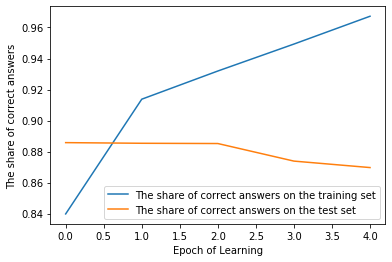

In [31]:
plt.plot(history.history['accuracy'], 
         label='The share of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The share of correct answers on the test set')
plt.xlabel('Epoch of Learning')
plt.ylabel('The share of correct answers')
plt.legend()
plt.show()

In [32]:
###LSTM
model_lstm = tf.keras.models.Sequential()
model_lstm.add(tf.keras.layers.Embedding(num_words, 32, input_length=max_news_len))
model_lstm.add(tf.keras.layers.LSTM(16))
model_lstm.add(tf.keras.layers.Dense(4, activation='softmax'))

In [33]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [34]:
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 32)            320000    
_________________________________________________________________
lstm (LSTM)                  (None, 16)                3136      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
Total params: 323,204
Trainable params: 323,204
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_lstm_save_path = 'news_cnn_best_model_lstm.h5'
checkpoint_callback_lstm = tf.keras.callbacks.ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [37]:
history_lstm = model_lstm.fit(X_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/5
844/844 [==============================] - ETA: 0s - loss: 0.5018 - accuracy: 0.8294
Epoch 00001: val_accuracy improved from -inf to 0.88592, saving model to news_cnn_best_model_lstm.h5
844/844 [==============================] - 12s 14ms/step - loss: 0.5018 - accuracy: 0.8294 - val_loss: 0.3370 - val_accuracy: 0.8859
Epoch 2/5
843/844 [============================>.] - ETA: 0s - loss: 0.2814 - accuracy: 0.9111
Epoch 00002: val_accuracy improved from 0.88592 to 0.88842, saving model to news_cnn_best_model_lstm.h5
844/844 [==============================] - 11s 14ms/step - loss: 0.2813 - accuracy: 0.9111 - val_loss: 0.3146 - val_accuracy: 0.8884
Epoch 3/5
844/844 [==============================] - ETA: 0s - loss: 0.2414 - accuracy: 0.9228
Epoch 00003: val_accuracy did not improve from 0.88842
844/844 [==============================] - 11s 14ms/step - loss: 0.2414 - accuracy: 0.9228 - val_loss: 0.3311 - val_accuracy: 0.8858
Epoch 4/5
841/844 [============================>.] - ETA

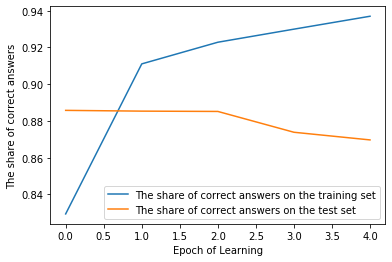

In [48]:
plt.plot(history_lstm.history['accuracy'], 
         label='The share of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The share of correct answers on the test set')
plt.xlabel('Epoch of Learning')
plt.ylabel('The share of correct answers')
plt.legend()
plt.show()

In [41]:
###GRU
model_gru = tf.keras.models.Sequential()
model_gru.add(tf.keras.layers.Embedding(num_words, 32, input_length=max_news_len))
model_gru.add(tf.keras.layers.GRU(16))
model_gru.add(tf.keras.layers.Dense(4, activation='softmax'))

In [42]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [43]:
model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 32)            320000    
_________________________________________________________________
gru (GRU)                    (None, 16)                2400      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
Total params: 322,468
Trainable params: 322,468
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_gru_save_path = 'news_cnn_best_model_gru.h5'
checkpoint_callback_gru = tf.keras.callbacks.ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [46]:
history_gru = model_gru.fit(X_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/5
844/844 [==============================] - ETA: 0s - loss: 0.6008 - accuracy: 0.7696
Epoch 00001: val_accuracy improved from -inf to 0.88183, saving model to news_cnn_best_model_gru.h5
844/844 [==============================] - 13s 16ms/step - loss: 0.6008 - accuracy: 0.7696 - val_loss: 0.3408 - val_accuracy: 0.8818
Epoch 2/5
842/844 [============================>.] - ETA: 0s - loss: 0.2910 - accuracy: 0.9049
Epoch 00002: val_accuracy improved from 0.88183 to 0.89158, saving model to news_cnn_best_model_gru.h5
844/844 [==============================] - 12s 14ms/step - loss: 0.2910 - accuracy: 0.9048 - val_loss: 0.3088 - val_accuracy: 0.8916
Epoch 3/5
844/844 [==============================] - ETA: 0s - loss: 0.2482 - accuracy: 0.9191
Epoch 00003: val_accuracy did not improve from 0.89158
844/844 [==============================] - 12s 14ms/step - loss: 0.2482 - accuracy: 0.9191 - val_loss: 0.3186 - val_accuracy: 0.8878
Epoch 4/5
844/844 [==============================] - ETA: 

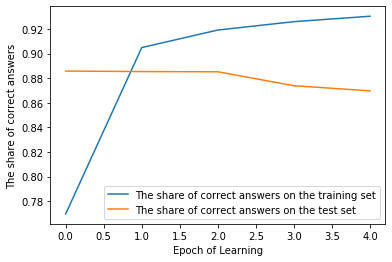

In [49]:
plt.plot(history_gru.history['accuracy'], 
         label='The share of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The share of correct answers on the test set')
plt.xlabel('Epoch of Learning')
plt.ylabel('The share of correct answers')
plt.legend()
plt.show()

In [50]:
###Loading test data set
test = pd.read_csv('news/test.csv', 
                    header=None, 
                    names=['class', 'title', 'text'])

In [51]:
test

,class,title,text
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [52]:
###Convert news to a numerical representation
test_sequences = tokenizer.texts_to_sequences(test['text'])

In [53]:
X_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_news_len)

In [54]:
X_test[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 2020, 3371,  449,   15, 6956,  252,   60,   33,
          28,  289,   12, 9088, 2184,  371,  169, 9284],
       [  92,  119,    4, 3472,    8,    1,  402,  134,   75, 5471, 1516,
        1227,    2, 3436,    8, 2744, 5220,  230,  936,   20, 2148,  117,
           1,   38,  561, 1974,    8,   14, 3957, 1218],
       [   2,   52, 5787,   18,    2, 4914,   15,    1,  525,    4, 4586,
         227,    2, 3922,    3, 1316,    2, 6888,    4, 2893,  576,   84,
          33,  758, 6515,    4,    1, 1013, 5154,    4],
       [9642, 1291,    6, 8714,   41,  671,   40, 2977,  177,    1,  108,
          26, 1027, 7300,   26,  760,    5, 3356,   40, 1271, 2450,   26,
        2170,   50, 3356,   26, 7415,    6, 9153,   26],
       [   0,    0,    0,    0,    0,    0,   39,  493, 7343,  832,  400,
         820,   28, 3827,    4,    1, 4474,   54, 9411,    1, 1273,   38,
        1230,    3, 1365,  348, 

In [55]:
y_test = tf.keras.utils.to_categorical(test['class'] - 1, nb_classes)

In [56]:
y_test

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [58]:
###Evaluate the quality of the network on a test data set
###One-Dimensional Convolutional NN
model_cnn.load_weights('news_cnn_best_model.h5')

In [59]:
model_cnn.evaluate(X_test, y_test, verbose=1)

238/238 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.8934


[0.14725619554519653, 0.8934210538864136]

In [60]:
###LSTM
model_lstm.load_weights('news_cnn_best_model_lstm.h5')

In [61]:
model_lstm.evaluate(X_test, y_test, verbose=1)

238/238 [==============================] - 1s 2ms/step - loss: 0.3207 - accuracy: 0.8943


[0.3206612765789032, 0.8943421244621277]

In [62]:
###GRU
model_gru.load_weights('news_cnn_best_model_gru.h5')

In [63]:
model_gru.evaluate(X_test, y_test, verbose=1)

238/238 [==============================] - 1s 2ms/step - loss: 0.3188 - accuracy: 0.8946


[0.3187570869922638, 0.894605278968811]